
# Project: Investigate a Dataset (No Show Appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The analyses explored the show up/no show up of patients to their medical appointments. The data has collected information about how patients are showing up for scheduled appointments. The dataset contains over 100,000 records with 14 columns. In this dataset, we will be looking at the percentages of showing up for appointments, the factors that are impacting the showup from the gender and age prospective. In addition, analysis was carried out to check the relationship of receiving appointments reminders and showing up at the day of the appointment.  


In [36]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [37]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Load the dataset
df = pd.read_csv('noshowappointments.csv')
df.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [38]:
# Checking the size of the dataset
df.shape

(110527, 14)

In [39]:
#Get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [40]:
No_Neighbourhood = len(df.Neighbourhood.unique())
print ("Number of Neighbourhood in this dataset", No_Neighbourhood)

Number of Neighbourhood in this dataset 81


>#### Summary of the dataset:
The above functions shows that we have 110,527 record in the dataset with 14 columns.
Several variables are reported and could have an impact on showing up for appointments such as Gender, Age, Hospital Location, Scholarship, Hipertension, Diabetes, Alchoholism. 
Number of neighbourhoods in the stury is 81. 

>Below we can see more statistical information about the data we have. For example, we can see the the average age of patients is 37 years and the percentage of patients were diagnostics with Hypertension, diabetes and Alcohlis are low.

In [41]:
# Get more statistical information
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


><b>Note:</b>
The information provided using 'info' function shows that all fields are populated with data, we don't have null values. However, with the describe function, we notice some data need to be cleaned
- The minimun value of the Age shows -1 as value. Age should not be minus values, hence we need to check the fields wih negative age, then we can drop them
- Some of the variables have spelling mistakes and require renaming such as 'Hipertension' and 'Handcap'. Both will be renamed to 'Hypertension' and 'Handicap'
- Variable 'No-Show' is confusing name as the values indicated with Yes means the patient didn't attend the appointment. Hence, we will be rename the field to 'MissedAppointment'
- AppointmentID is not are required for our study , we can omit that field
- ScheduledDay and AppointmentDay are shown as string, so we might need to convert them to more meaningfull type so we can used it in the analysis

In the next section, we will clean the data that we identified.

### Data Cleaning (Replace this with more specific notes!)

#### Data Cleaning Activity

> In this secion we will perform data cleaning for the above noted points which include:
- Renaming variables
- Removing records with invalid age 
- Removing unrequired variables
- Convert date variables into date objects

In [42]:
# The following code will be used to rename the variables of Hypertension and Handicap and No-show
df = df.rename(columns={'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'MissedAppointment'})


In [43]:
# The follwoing piece of code will get the records with negative values in the Age variable, then drop them from the dataset

# Get the list of rows with -1 age
indexNames = df[ df['Age'] == -1 ].index
print (indexNames)

#Delete this row from dataset
df.drop(indexNames , inplace=True)

Int64Index([99832], dtype='int64')


In [44]:
# We are not interested in the Paient ID or appointment ID so we can drop this variable
df.drop(['PatientId','AppointmentID'], axis=1 , inplace=True)

In [45]:
# Convert the ScheduleDay and AppointmentDay to DateTime 

pd.to_datetime(df['ScheduledDay'])
pd.to_datetime(df['AppointmentDay'])

#df['ScheduledDay'].dt.date
#df['AppointmentDay'].dt.date

df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,MissedAppointment
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [46]:
# Checking the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender               110526 non-null object
ScheduledDay         110526 non-null object
AppointmentDay       110526 non-null object
Age                  110526 non-null int64
Neighbourhood        110526 non-null object
Scholarship          110526 non-null int64
Hypertension         110526 non-null int64
Diabetes             110526 non-null int64
Alcoholism           110526 non-null int64
Handicap             110526 non-null int64
SMS_received         110526 non-null int64
MissedAppointment    110526 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

 

### Research Question 1 (Analysis of Show/No Show)

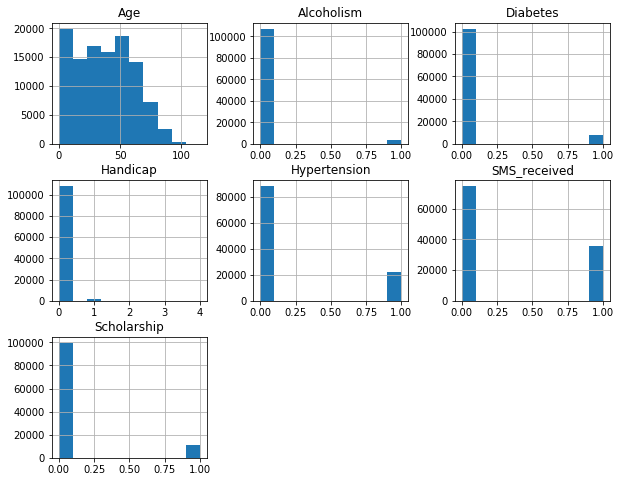

In [47]:
#General Exploration of the data using figures
df.hist(figsize= (10,8));

> The above shows histograms of the whole data frame. We can see the age is ranging from 0 to about 100 with skewed left as majority of patients are below 70 years. Low percentage of patients with diabetes, hypertension, alcoholism and handicap.  We can also see that low percentage of patients have scholorship for medical. In terms of receiving SMS messages, we can see about one-third of patients received SMS.

> In thw next section we will explore the data in more details starting by looking at the percentage of patients show up for the appointments and relate the numbers with average of age and type of gender


Missed Appointment Summary
--------------------------
Total number of patients provided in the data set:  110526
 
Number of patient show up for the appoitnments is 88207 with a percentage of 80.0 %
Number of patient did not show up for the appoitnments is 22319 with a percentage of 20.0 %
--------------------------
Missed Appointment Chart


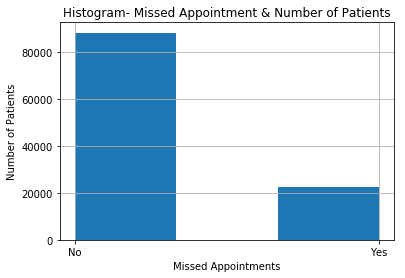

In [48]:
# Checking the average of people showup for the appointment

showup = df.MissedAppointment == 'No'
noshowup = df.MissedAppointment == 'Yes'

 
#df.MissedAppointment.value_counts


print ("Missed Appointment Summary")
print ("--------------------------")
print ("Total number of patients provided in the data set: ", (showup.sum()+ noshowup.sum()))
print (" ")
print ("Number of patient show up for the appoitnments is", showup.sum(), "with a percentage of", round(showup.mean()*100), "%")
print ("Number of patient did not show up for the appoitnments is", noshowup.sum(), "with a percentage of", round(noshowup.mean()*100), "%")

print ("--------------------------")
print ("Missed Appointment Chart")
df['MissedAppointment'].hist(bins=3);
plt.xlabel('Missed Appointments')
plt.ylabel('Number of Patients')
plt.title('Histogram- Missed Appointment & Number of Patients')
plt.grid(True)


Compare the patients attended the appointments versus patients missed them from age prospective


Text(0.5,1,'Histogram- Age vs Number of Patients')

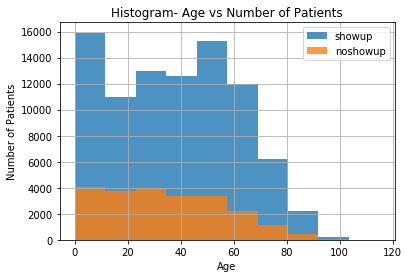

In [49]:
# Checking the average of people showup for the appointment relating to Age
showup = df.MissedAppointment == 'No'
noshowup = df.MissedAppointment == 'Yes'

print("Compare the patients attended the appointments versus patients missed them from age prospective")
df.Age[showup].hist(alpha= 0.8, label='showup')
df.Age[noshowup].hist(alpha= 0.8, label='noshowup')
plt.legend();
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Histogram- Age vs Number of Patients')


In [50]:
#Showing the average of the people attending the appointment and the one who did not
print ("Average of patients' age show up for appointments is" , df.Age[showup].mean())
print ("Average of patients' age did not show up for appointments is" , df.Age[noshowup].mean())


Average of patients' age show up for appointments is 37.790504155
Average of patients' age did not show up for appointments is 34.3176665621


Comparing the patients attended the appointments from gender prospective
--------------------------
Total number of  patients  in the data set:  110526
 
Number of female patients in the dataset: 71839 with a percentage of 65.0 %
Number of male patients in the dataset: 38687 with a percentage of 35.0 %


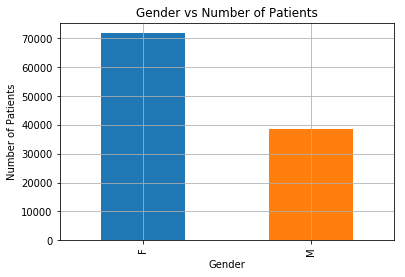

In [51]:
print("Comparing the patients attended the appointments from gender prospective")

Female = df.Gender == 'F'
Male = df.Gender == 'M'


print ("--------------------------")
print ("Total number of  patients  in the data set: ", (Female.sum()+ Male.sum()))
print (" ")
print ("Number of female patients in the dataset:", Female.sum(), "with a percentage of", round(Female.mean()*100), "%")
print ("Number of male patients in the dataset:", Male.sum(), "with a percentage of", round(Male.mean()*100), "%")
df.groupby('Gender').MissedAppointment.count().plot(kind='bar')
plt.title('Gender vs Number of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.grid(True)

Number of Pationts Showup for Appointment by Gender
Number of   88207


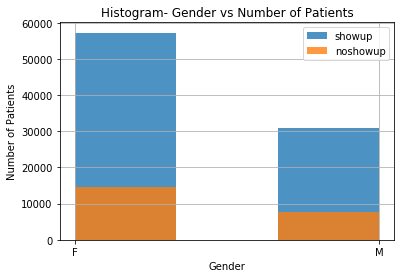

In [52]:
#Show/No Show by Gender
print ("Number of Pationts Showup for Appointment by Gender")

#Total number of  
print ("Number of  " , df.Gender[showup].count())

#Total number of male 
df.MissedAppointment[Male].count()

df.Gender[showup].hist(bins = 3, alpha= 0.8, label='showup')
df.Gender[noshowup].hist(bins = 3, alpha= 0.8, label='noshowup')
plt.legend();
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Histogram- Gender vs Number of Patients')
plt.grid(True)

>We can see that  about 80% of patients did show up for their appoitments, while about 20% did not attend the appointments.
In both cases, we can see that females are forming the large percentage of attending the appointments with 65%, while the males are aounr 35%.
In terms of age, the majority of patients attended the appoitntments are ranging from 0 to 10 and 40 to 50 years.

### Research Question 2  (Relationship between receiving SMS and attending the appointment)

In the coming section, we will explore the relationshipt between receiving the SMS as reminder and attending the appoitnment. 

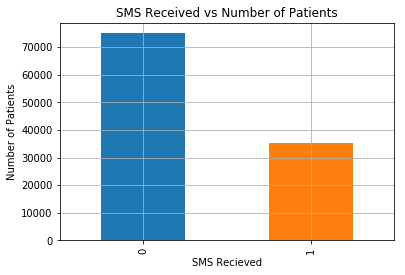

In [53]:
#Display a bar chart showing numner of patients who received/did not receive SMS for their appointments
df.groupby('SMS_received').MissedAppointment.count().plot(kind='bar')
plt.xlabel('SMS Recieved')
plt.ylabel('Number of Patients')
plt.title('SMS Received vs Number of Patients')
plt.grid(True)

> The chart shows over 70,000 patients did not receive SMS message as a reminder of the appointment, while about 35,000 patients recived SMS reminders. 
Looking up closely, the histogram below displays the details from attending/not attending the appointment upon receiving the SMS

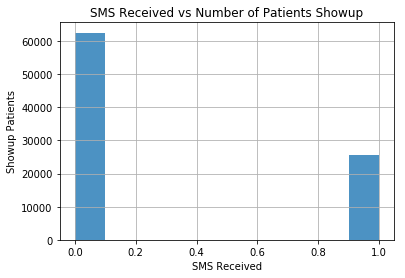

In [54]:
#Display a histogram showing people attended the appoitnment- Did they receive SMS messages before the appointment
df.SMS_received[showup].hist(alpha= 0.8, label='showup')
plt.xlabel('SMS Received')
plt.ylabel('Showup Patients')
plt.title('SMS Received vs Number of Patients Showup')
plt.grid(True)

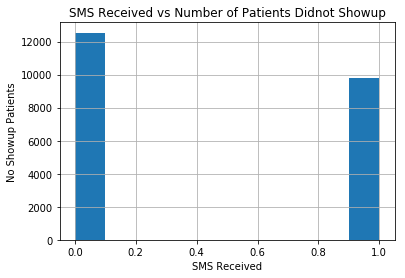

In [55]:
#Display a histogram showing people didnot attended the appoitnment- Did they receive SMS messages before the appointment
df.SMS_received[noshowup].hist()
plt.xlabel('SMS Received')
plt.ylabel('No Showup Patients')
plt.title('SMS Received vs Number of Patients Didnot Showup')
plt.grid(True)

>The diagram shows that tha mojority of patients didnot show up for appointments were actually received SMS. the percentage of showing ups  or not showing in case of receiving SMS reminder might not help us to predict if patient will show up. 

<a id='conclusions'></a>
## Conclusions

The purpose of this project was to explore and analyze a dataset for attending appointments for patients.The analyses explored the show up/no show up of patients to their medical appointments. Data were analyzed from the gender and age prospective. In addition, analysis was carried out to check the relationship of receiving appointments and showing up. 

### Results
The results shows that
- The majority of patients attended their appointments with percentage of 80%
- A large percentage of patients showed up for appointments were females
- The majority of patients showed up attended appointments were below 65 years
- There is no abvoius relation between receiving SMS remind meassages and attending appointments


### Limitations
Due to limitation in time, several aspects of the data could not be analysed. 
- The analysis could be extended more to study the relationship between the day of scheduling the appointment and the actual day of appointment. This may help us to get a better understanding of the patients behavoiur comparing with the appointment lead time.
- The future data analysist could also look at the relationship of the showing up in the appointments by analysing the other factors such as hospital location, wheather the patient has hypertension, diabetes, or alcoholic.


In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0